<a href="https://colab.research.google.com/github/PatrickRuan/3rd-ML100Days/blob/master/homework/D48_Kaggle_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
root = 'drive/My Drive/'
learning = root + '學習/'
ai3 = learning + 'CupoyAI3/'


import pandas as pd
from sklearn.model_selection import train_test_split

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
fname = ai3 + 'D48/train.csv'
data = pd.read_csv(fname, header = None)
fname = ai3 + 'D48/test.csv'
test = pd.read_csv(fname, header= None)
fname = ai3 + 'D48/trainLabels.csv'
target =pd.read_csv(fname, header =None)

In [4]:
data.shape    # (1000,400)
target.shape  # (1000,1)  # This is a regression issue?
target # all most of them are 0, 1 <== regreesion, real?
type(target)
target.nunique() # yes, it is 2 kind of data, it is a classification

0    2
dtype: int64

In [5]:
#data.info()  # no null elements, and all float64
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,-1.408370,1.114744,0.910415,2.218110,4.305643,0.088924,0.169149,0.413448,1.513862,2.662967,-1.072765,0.149111,0.559579,4.378885,-0.463603,-0.063959,0.544930,0.712772,-1.494050,-2.636169,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,0.935347,1.057796,-0.539275,-0.172662,-0.679051,0.607362,1.148635,2.437077,-0.313069,0.528104,-0.513476,0.766221,-1.466939,-2.318885,1.647223,-1.556443,-1.645581,-0.198467,-1.472066,-1.906147,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,-0.890270,0.909969,-11.851312,3.352420,-4.862125,-0.903317,-1.824344,0.045446,-2.126474,1.161563,-1.027912,-1.078792,1.848525,3.758918,0.623649,-0.091044,-1.033094,-0.254151,-4.377542,-1.196298,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,-0.713474,-0.136399,0.058990,-1.083458,1.622659,-1.685582,-1.222879,-0.215834,0.155612,0.627873,-0.732789,1.337941,1.335689,0.680062,0.504754,1.204808,0.144477,0.673993,1.027921,3.073382,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,-0.416575,0.433862,-12.822821,-0.048248,-5.031497,-0.704413,0.515952,-2.635899,-2.359881,-0.053400,0.741432,1.573043,0.723686,1.735602,0.335774,0.572905,0.625971,0.412084,-4.883833,-5.588332,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [6]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,-0.016250,-0.038010,-1.985616,0.012374,-0.029229,-0.039307,-0.004091,-0.032836,0.428313,0.043427,0.073461,-0.005140,0.912288,0.902301,-0.023110,0.047473,-0.041117,0.012985,-0.395782,0.123921,0.030651,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,1.026325,0.985889,4.528096,0.995652,2.164547,1.002481,0.970401,1.000130,2.176020,0.987689,0.967282,0.980319,2.178778,4.241903,1.019566,0.995752,0.998182,1.030610,2.296818,2.410453,1.011645,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,-3.304074,-3.157436,-14.706080,-3.002151,-6.790633,-2.914729,-3.464048,-2.944093,-8.258306,-3.423875,-4.251382,-2.822644,-6.337522,-16.156070,-3.218446,-2.820792,-3.023811,-3.054384,-8.034421,-7.105723,-3.379194,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,-0.713704,-0.730293,-5.094964,-0.694081,-1.441443,-0.757619,-0.668335,-0.727001,-0.983595,-0.594638,-0.588171,-0.698036,-0.542526,-1.822188,-0.720837,-0.617001,-0.668062,-0.696411,-1.936374,-1.562374,-0.659457,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,0.019479,-0.075950,-2.103532,-0.005946,-0.033219,-0.019046,0.008360,-0.011366,0.488217,0.082688,0.094307,-0.004404,1.050071,0.970403,-0.012183,0.014636,-0.017535,0.039219,-0.489296,-0.040604,0.049416,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,0.709416,0.644553,1.186164,0.664921,1.492611,0.678748,0.674583,0.588732,1.915022,0.711525,0.727896,0.673427,2.367748,3.825862,0.671318,0.731892,0.642797,0.706336,1.044188,1.614308,0.747031,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,3.409653,3.253032,12.186445,3.737423,6.959736,3.100935,2.805197,3.291544,7.074432,3.343812,2.938033,3.053262,8.096838,14.373681,2.981582,3.662800,3.293911,3.069885,7.413173,8.812739,2.844792,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984


In [7]:

from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV

train_x, test_x, train_y, test_y = train_test_split(data, target, random_state = 43, test_size = 0.2)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((800, 40), (200, 40), (800, 1), (200, 1))

In [8]:
estimator = RandomForestClassifier()
estimator.fit(train_x, train_y)
pred = estimator.predict(test_x)
pred_submission = estimator.predict(test)


accuracy = metrics.accuracy_score(test_y, pred)
print(f"Accuracy: {accuracy}")
#print("Feature importance: ", estimator.feature_importances_)

Accuracy: 0.8


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
submission = pd.DataFrame()
submission['Id']=list(range(1,9001))
submission['Solution']= pred_submission

'''
pred  = clf_bestparam.predict(test_data)
rfc_best_pred = pd.DataFrame(pred)

rfc_best_pred.index += 1

rfc_best_pred.columns = ['Solution']
rfc_best_pred['Id'] = np.arange(1,rfc_best_pred.shape[0]+1)
rfc_best_pred = rfc_best_pred[['Id', 'Solution']]

rfc_best_pred.to_csv('Roi_2019-10-14.csv',index=False)

'''
submission
submission.to_csv(ai3+'D48/D48.csv', index=False)

<Figure size 1080x1080 with 0 Axes>

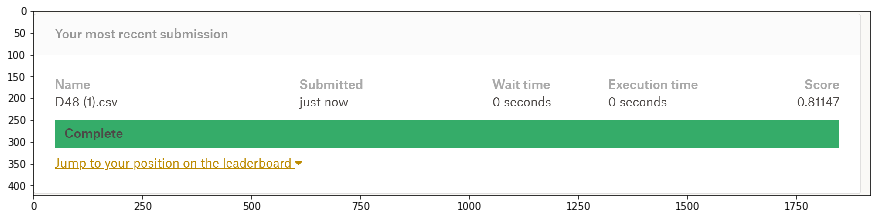

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
plt.figure(figsize=(15,15))
img = cv2.imread(learning+'CupoyAI3/D48/0.81png.png')
plt.figure(figsize=(15,15))
plt.imshow(img)